In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('datasets_master_housing.csv')
len(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


/Users/pratikaman/Documents/ml_zoomcamp/zoomcamp_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pratikaman/Documents/ml_zoomcamp/zoomcamp_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


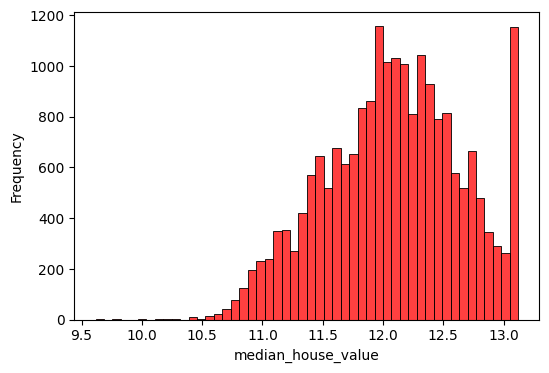

In [3]:
log_median_house_value = np.log1p(df.median_house_value)

plt.figure(figsize=(6, 4))

sns.histplot(log_median_house_value, bins=50, color='red')
plt.ylabel('Frequency')
plt.xlabel('median_house_value')

plt.show()

In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
df2 = df.loc[(df.ocean_proximity.isin(['<1H OCEAN', 'INLAND']))]

In [7]:
df2.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [8]:
df2 = df2[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]

In [9]:
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


----------------------- Question 1 -----------------------------

In [10]:
df2.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

----------------------- Question 2 -----------------------------------

In [11]:
df2.population.median()

1195.0

------------------------ Question 3 ------------------------------------

In [12]:


n = len(df2)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df2.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [13]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [14]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

print(y_train)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

[11.16196275 12.32163544 12.4718963  ... 13.12236738 12.11888489
 12.52924613]


In [31]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def prepare_X(df, fill):
    df_num = df
    df_num = df_num.fillna(fill)
    X = df_num.values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)


In [16]:
X_train = prepare_X(df_train, 0)
print(X_train)
w_0, w = train_linear_regression(X_train, y_train)
w

[[-1.1914e+02  3.6230e+01  2.2000e+01 ...  1.9270e+03  5.3000e+02
   2.5875e+00]
 [-1.1779e+02  3.4120e+01  1.6000e+01 ...  1.3190e+03  4.4600e+02
   4.8125e+00]
 [-1.1797e+02  3.3680e+01  2.6000e+01 ...  1.9300e+03  5.8500e+02
   5.7301e+00]
 ...
 [-1.1808e+02  3.4130e+01  4.6000e+01 ...  3.7700e+02  1.4500e+02
   8.4546e+00]
 [-1.1846e+02  3.4290e+01  2.4000e+01 ...  3.1510e+03  8.1000e+02
   3.0526e+00]
 [-1.1841e+02  3.4000e+01  1.8000e+01 ...  8.8400e+02  4.5600e+02
   2.9338e+00]]


array([-2.55938802e-01, -2.68233309e-01,  1.77710730e-03, -3.38393956e-05,
        2.93766352e-04, -1.52190447e-04,  3.96908643e-04,  1.80600946e-01])

In [23]:
# Using 0 to fill empty values in total_bedrooms column.
X_val = prepare_X(df_val, 0)
y_pred = w_0 + X_val.dot(w)

rmse_with_0 = round(rmse(y_val, y_pred), 2)
print(rmse_with_0)

0.34


In [24]:
# Using mean to fill empty values in total_bedrooms column.

total_bedrooms_mean = df_train.total_bedrooms.mean()
print(total_bedrooms_mean)

542.552956325786


In [26]:
X_val = prepare_X(df_val, total_bedrooms_mean)
y_pred = w_0 + X_val.dot(w)

rmse_with_mean = round(rmse(y_val, y_pred), 2)
print(rmse_with_mean)

0.34


------------------------------- Question 4 ------------------------------------

In [32]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg


    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [34]:
X_train = prepare_X(df_train, 0)

rmse_values = {}
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r)
    X_val = prepare_X(df_val, 0)
    y_pred = w_0 + X_val.dot(w)
    rmse_values[f"{r}"] = round(rmse(y_val, y_pred), 2)

print(rmse_values)
    

{'0': 0.34, '1e-06': 0.34, '0.0001': 0.34, '0.001': 0.34, '0.01': 0.34, '0.1': 0.34, '1': 0.34, '5': 0.35, '10': 0.35}


-------------------------------- Question 5 -----------------------------------

In [37]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rmse_scores = []

for seed in seeds:
    n = len(df2)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_shuffled = df2.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)


    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train = prepare_X(df_train, 0)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, 0)
    y_pred = w_0 + X_val.dot(w)

    rmse_scores.append(round(rmse(y_val, y_pred), 2))

deviation = round(np.std(np.array(rmse_scores)), 3)

print(deviation)

0.006


------------------------------------- Question 6 -------------------------------------

In [40]:
n = len(df2)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = df2.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)


del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

y_train_new = np.concatenate((arr1, arr2))pd.concat([])
df_train_new = pd.concat([df_train, df_val]) 

X_train = prepare_X(df_train_new, 0)
w_0, w = train_linear_regression_reg(X_train, y_train_new, 0.001)

X_test = prepare_X(df_test, 0)
y_pred = w_0 + X_test.dot(w)

rmse_with_mean = round(rmse(y_test, y_pred), 2)
print(rmse_with_mean)

NameError: name 'y_train_new' is not defined